In [75]:
import pandas as pd
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [76]:
# creating numerical_df
df = df.select_dtypes(include=['number'])

### DATA WRANGLING

In [77]:
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9082 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        9082 non-null   int64
 1   income                         9082 non-null   int64
 2   monthly_premium_auto           9082 non-null   int64
 3   months_since_last_claim        9082 non-null   int64
 4   months_since_policy_inception  9082 non-null   int64
 5   number_of_open_complaints      9082 non-null   int64
 6   number_of_policies             9082 non-null   int64
 7   total_claim_amount             9082 non-null   int64
dtypes: int64(8)
memory usage: 638.6 KB


### SPLIT

In [78]:
 # Defining x explanatory variables and 1x y traget variable

In [79]:
X = df[["customer_lifetime_value","income","monthly_premium_auto","months_since_last_claim","months_since_policy_inception",
        "number_of_open_complaints","number_of_policies"]]
y = df[["total_claim_amount"]]

In [80]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 100)

### SCALING WITH PT (PowerTransformer)

In [46]:
# SCALE VARIABLES AFTER THE SPLIT (NOT TO MIX TEST AND TRAIN DATA)

In [81]:
import seaborn as sns

In [102]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import numpy as np

In [103]:
# Iniciated the PowerTransformer my my case # "pt" is the scaler 
pt = PowerTransformer()

# Fit the transformer to my X_train data 
pt = pt.fit(X_train)

# Transform X_train using the fitted transformer
X_train_trans = pt.transform(X_train)

# Transform X_test using the fitted transformer
X_test_trans = pt.transform(X_test) 

# keeps them separately. It also ensures consistency in the transformation process, but only for X! 

# --------------------WHY DONT WE SCALE Y???? --------------------------------

array([[<Axes: title={'center': 'total_claim_amount'}>]], dtype=object)

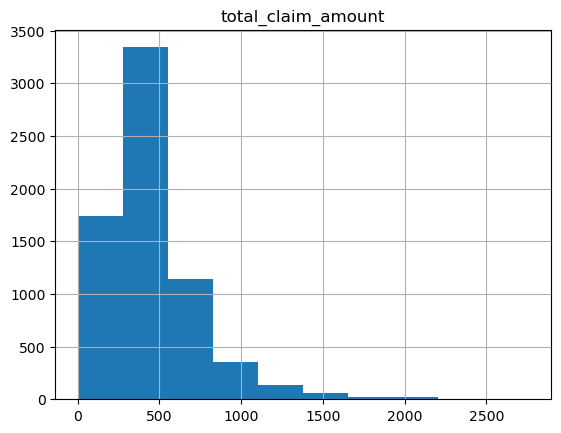

In [119]:
y_train.hist()

###  ALTERNATIVE: SCALING WITH STANDARD SCALER 

In [124]:
# calling the scaler and saving with scaler 
scaler = StandardScaler()

# create the frame/fit
scaler = scaler.fit(X_train)

# populate with data/transform and save in new variables 
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

In [125]:
X_train_fit

StandardScaler()

### Model training

In [67]:
from sklearn.linear_model import LinearRegression

In [107]:
# i train the model with the transformed training sets from exploring var x and **non-transformed** labels y
lm = LinearRegression()
model = lm.fit(X_train_trans,y_train) 

In [108]:
model.coef_

array([[-1.19519701e+01, -3.04144244e+01,  1.92214112e+02,
         4.02244419e+00, -2.29588856e+00, -2.73817298e+00,
        -8.76425690e-02]])

In [109]:
model.intercept_

# --------- intercept for what? ----------------

array([438.93716048])

### Model Interpretation

In [110]:
predictions = model.predict(X_test)
predictions

/Users/bart/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[ -751122.13934811],
       [-1034822.83200524],
       [-2819133.43486321],
       ...,
       [ -744999.53341195],
       [ -949514.46243699],
       [-2894525.84902844]])

In [74]:
# -----  is this correct???? do i use the unscaled x_test? why? ----------
random_test = X_test.sample()

In [57]:
random_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
1452,11073,82807,92,15,20,0,2


In [19]:
model.predict(random_test)

/Users/bart/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[-553098.71256027]])

### Create predictions for test set

In [112]:
y_pred = model.predict(X_test_trans)

In [113]:
y_pred = pd.DataFrame(y_pred)

In [114]:
y_test = y_test.reset_index(drop=True)

In [115]:
resiudals_df = pd.concat([y_test,y_pred],axis=1)

In [116]:
residuals_df = resiudals_df.rename(columns={"total_claim_amount":"y_test", 0:"y_pred"})

# -------- WHAT IS HAPPENING HERE? --------  NOT ENTIERLY CLEAR ----------

In [117]:
residuals_df["residual"] = residuals_df["y_test"]-residuals_df["y_pred"]

In [118]:
round(residuals_df,2)

,y_test,y_pred,residual
0,585,642.70,-57.70
1,601,518.33,82.67
2,62,307.72,-245.72
3,18,260.82,-242.82
4,404,970.42,-566.42
...,...,...,...
2266,231,533.17,-302.17
2267,297,252.52,44.48
2268,494,540.18,-46.18
2269,307,313.82,-6.82
